In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from PIL import Image

In [3]:
data = []
labels = []
height = 30
width = 30
channels = 3
classes = 43
n_inputs = height * width * channels

In [4]:
for i in range(classes):
    path = r"C:\Users\z0045vws\Desktop\TH_Koeln_Projekt_Adversarial_Attack\Train\{0}/".format(i)
    print(path)
    Class = os.listdir(path)
    for a in Class:
        try:
            image = cv2.imread(path + a)
            image_from_array = Image.fromarray(image, 'RGB')
            size_image = image_from_array.resize((height, width))
            data.append(np.array(size_image))
            labels.append(i)
        except AttributeError:
            print(" ")

C:\Users\z0045vws\Desktop\TH_Koeln_Projekt_Adversarial_Attack\Train\0/
C:\Users\z0045vws\Desktop\TH_Koeln_Projekt_Adversarial_Attack\Train\1/
C:\Users\z0045vws\Desktop\TH_Koeln_Projekt_Adversarial_Attack\Train\2/
C:\Users\z0045vws\Desktop\TH_Koeln_Projekt_Adversarial_Attack\Train\3/
C:\Users\z0045vws\Desktop\TH_Koeln_Projekt_Adversarial_Attack\Train\4/
C:\Users\z0045vws\Desktop\TH_Koeln_Projekt_Adversarial_Attack\Train\5/
C:\Users\z0045vws\Desktop\TH_Koeln_Projekt_Adversarial_Attack\Train\6/
C:\Users\z0045vws\Desktop\TH_Koeln_Projekt_Adversarial_Attack\Train\7/
C:\Users\z0045vws\Desktop\TH_Koeln_Projekt_Adversarial_Attack\Train\8/
C:\Users\z0045vws\Desktop\TH_Koeln_Projekt_Adversarial_Attack\Train\9/
C:\Users\z0045vws\Desktop\TH_Koeln_Projekt_Adversarial_Attack\Train\10/
C:\Users\z0045vws\Desktop\TH_Koeln_Projekt_Adversarial_Attack\Train\11/
C:\Users\z0045vws\Desktop\TH_Koeln_Projekt_Adversarial_Attack\Train\12/
C:\Users\z0045vws\Desktop\TH_Koeln_Projekt_Adversarial_Attack\Train\13/
C:

In [85]:
Cells = np.array(data)
labels = np.array(labels)

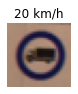

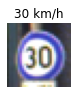

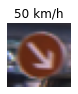

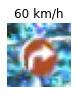

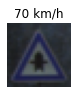

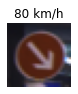

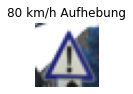

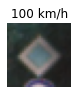

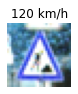

In [86]:
import matplotlib.pyplot as plt
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(Cells[i])
    plt.title(labels[i])
    plt.axis("off")
    plt.show()

In [7]:
# Randomize the order of the input images
s = np.arange(Cells.shape[0])
np.random.seed(43)
np.random.shuffle(s)
Cells = Cells[s]
labels = labels[s]

In [8]:
#Spliting the images into train and validation sets
(X_train,X_val)=Cells[(int)(0.2*len(labels)):],Cells[:(int)(0.2*len(labels))]
X_train = X_train.astype('float32')/255
X_val = X_val.astype('float32')/255
(y_train,y_val)=labels[(int)(0.2*len(labels)):],labels[:(int)(0.2*len(labels))]

In [9]:
#Using one hote encoding for the train and validation labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

epochs = 20
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")
model.fit(X_train, y_train, batch_size=32, epochs=epochs,validation_data=(X_val, y_val), callbacks = tensorboard_callback)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0

In [11]:
#Predicting with the test data
y_test=pd.read_csv(r'C:\Users\z0045vws\Desktop\TH_Koeln_Projekt_Adversarial_Attack\Test.csv')
labels=y_test['Path'].to_numpy()
y_test=y_test['ClassId'].values
data=[]

In [12]:
for f in labels:
    image=cv2.imread(r'C:\Users\z0045vws\Desktop\TH_Koeln_Projekt_Adversarial_Attack\Test/'+f.replace('Test', ''))
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((height, width))
    data.append(np.array(size_image))

In [13]:
X_test=np.array(data)
X_test = X_test.astype('float32')/255
pred = model.predict(X_test)

In [14]:
print(len(pred))
for y in range(len(pred)):
    x = np.argmax(pred[y])
    print("Confidence for",y,pred[y][x])

12630
Confidence for 0 1.0
Confidence for 1 1.0
Confidence for 2 1.0
Confidence for 3 1.0
Confidence for 4 1.0
Confidence for 5 1.0
Confidence for 6 1.0
Confidence for 7 1.0
Confidence for 8 1.0
Confidence for 9 1.0
Confidence for 10 0.9980883
Confidence for 11 1.0
Confidence for 12 0.9999937
Confidence for 13 0.99988544
Confidence for 14 0.99999964
Confidence for 15 0.99999976
Confidence for 16 0.9999453
Confidence for 17 0.9999982
Confidence for 18 0.9997055
Confidence for 19 1.0
Confidence for 20 1.0
Confidence for 21 1.0
Confidence for 22 1.0
Confidence for 23 1.0
Confidence for 24 1.0
Confidence for 25 1.0
Confidence for 26 1.0
Confidence for 27 1.0
Confidence for 28 0.99999785
Confidence for 29 1.0
Confidence for 30 0.9999995
Confidence for 31 1.0
Confidence for 32 1.0
Confidence for 33 0.9757404
Confidence for 34 1.0
Confidence for 35 1.0
Confidence for 36 1.0
Confidence for 37 0.9999964
Confidence for 38 1.0
Confidence for 39 0.9965759
Confidence for 40 1.0
Confidence for 41 0.

Confidence for 485 1.0
Confidence for 486 0.9996166
Confidence for 487 1.0
Confidence for 488 1.0
Confidence for 489 1.0
Confidence for 490 1.0
Confidence for 491 0.9999999
Confidence for 492 0.4369094
Confidence for 493 1.0
Confidence for 494 0.99997437
Confidence for 495 0.9999894
Confidence for 496 0.62843055
Confidence for 497 1.0
Confidence for 498 1.0
Confidence for 499 0.8911046
Confidence for 500 1.0
Confidence for 501 0.99390924
Confidence for 502 0.9945741
Confidence for 503 1.0
Confidence for 504 1.0
Confidence for 505 0.9999995
Confidence for 506 1.0
Confidence for 507 1.0
Confidence for 508 1.0
Confidence for 509 1.0
Confidence for 510 1.0
Confidence for 511 1.0
Confidence for 512 1.0
Confidence for 513 1.0
Confidence for 514 1.0
Confidence for 515 1.0
Confidence for 516 1.0
Confidence for 517 1.0
Confidence for 518 1.0
Confidence for 519 1.0
Confidence for 520 0.99999976
Confidence for 521 1.0
Confidence for 522 1.0
Confidence for 523 1.0
Confidence for 524 1.0
Confidence

Confidence for 1168 1.0
Confidence for 1169 1.0
Confidence for 1170 1.0
Confidence for 1171 0.9999999
Confidence for 1172 1.0
Confidence for 1173 1.0
Confidence for 1174 1.0
Confidence for 1175 1.0
Confidence for 1176 1.0
Confidence for 1177 0.8848588
Confidence for 1178 1.0
Confidence for 1179 1.0
Confidence for 1180 1.0
Confidence for 1181 1.0
Confidence for 1182 0.9999999
Confidence for 1183 1.0
Confidence for 1184 1.0
Confidence for 1185 1.0
Confidence for 1186 1.0
Confidence for 1187 0.99999905
Confidence for 1188 0.9999993
Confidence for 1189 0.99991906
Confidence for 1190 1.0
Confidence for 1191 1.0
Confidence for 1192 0.99999976
Confidence for 1193 1.0
Confidence for 1194 1.0
Confidence for 1195 1.0
Confidence for 1196 1.0
Confidence for 1197 1.0
Confidence for 1198 1.0
Confidence for 1199 1.0
Confidence for 1200 0.999995
Confidence for 1201 0.99967015
Confidence for 1202 1.0
Confidence for 1203 1.0
Confidence for 1204 0.99735355
Confidence for 1205 1.0
Confidence for 1206 1.0


Confidence for 1816 1.0
Confidence for 1817 0.9999461
Confidence for 1818 1.0
Confidence for 1819 0.32411617
Confidence for 1820 0.99993074
Confidence for 1821 1.0
Confidence for 1822 1.0
Confidence for 1823 1.0
Confidence for 1824 0.99992454
Confidence for 1825 1.0
Confidence for 1826 1.0
Confidence for 1827 1.0
Confidence for 1828 1.0
Confidence for 1829 1.0
Confidence for 1830 1.0
Confidence for 1831 0.9999999
Confidence for 1832 1.0
Confidence for 1833 1.0
Confidence for 1834 1.0
Confidence for 1835 1.0
Confidence for 1836 1.0
Confidence for 1837 1.0
Confidence for 1838 1.0
Confidence for 1839 1.0
Confidence for 1840 1.0
Confidence for 1841 1.0
Confidence for 1842 1.0
Confidence for 1843 1.0
Confidence for 1844 0.99745935
Confidence for 1845 1.0
Confidence for 1846 0.9999958
Confidence for 1847 1.0
Confidence for 1848 1.0
Confidence for 1849 1.0
Confidence for 1850 1.0
Confidence for 1851 0.99981683
Confidence for 1852 1.0
Confidence for 1853 0.99999857
Confidence for 1854 0.999996

Confidence for 2217 1.0
Confidence for 2218 0.99998856
Confidence for 2219 0.99997914
Confidence for 2220 0.99843854
Confidence for 2221 1.0
Confidence for 2222 0.9999999
Confidence for 2223 1.0
Confidence for 2224 1.0
Confidence for 2225 1.0
Confidence for 2226 1.0
Confidence for 2227 0.9999999
Confidence for 2228 0.72234905
Confidence for 2229 1.0
Confidence for 2230 1.0
Confidence for 2231 1.0
Confidence for 2232 1.0
Confidence for 2233 1.0
Confidence for 2234 1.0
Confidence for 2235 0.96721274
Confidence for 2236 1.0
Confidence for 2237 1.0
Confidence for 2238 1.0
Confidence for 2239 1.0
Confidence for 2240 1.0
Confidence for 2241 1.0
Confidence for 2242 1.0
Confidence for 2243 1.0
Confidence for 2244 1.0
Confidence for 2245 1.0
Confidence for 2246 1.0
Confidence for 2247 0.9999999
Confidence for 2248 1.0
Confidence for 2249 1.0
Confidence for 2250 1.0
Confidence for 2251 1.0
Confidence for 2252 1.0
Confidence for 2253 1.0
Confidence for 2254 1.0
Confidence for 2255 1.0
Confidence 

Confidence for 2654 1.0
Confidence for 2655 0.99999976
Confidence for 2656 1.0
Confidence for 2657 1.0
Confidence for 2658 1.0
Confidence for 2659 0.99999356
Confidence for 2660 0.9999745
Confidence for 2661 1.0
Confidence for 2662 1.0
Confidence for 2663 0.99999964
Confidence for 2664 1.0
Confidence for 2665 1.0
Confidence for 2666 1.0
Confidence for 2667 0.9999989
Confidence for 2668 1.0
Confidence for 2669 0.9999999
Confidence for 2670 1.0
Confidence for 2671 1.0
Confidence for 2672 1.0
Confidence for 2673 1.0
Confidence for 2674 1.0
Confidence for 2675 1.0
Confidence for 2676 1.0
Confidence for 2677 1.0
Confidence for 2678 0.9999999
Confidence for 2679 0.99998116
Confidence for 2680 1.0
Confidence for 2681 1.0
Confidence for 2682 0.9635248
Confidence for 2683 1.0
Confidence for 2684 1.0
Confidence for 2685 1.0
Confidence for 2686 1.0
Confidence for 2687 0.999905
Confidence for 2688 1.0
Confidence for 2689 0.9576193
Confidence for 2690 1.0
Confidence for 2691 1.0
Confidence for 2692

Confidence for 3061 1.0
Confidence for 3062 1.0
Confidence for 3063 1.0
Confidence for 3064 1.0
Confidence for 3065 1.0
Confidence for 3066 1.0
Confidence for 3067 1.0
Confidence for 3068 1.0
Confidence for 3069 1.0
Confidence for 3070 1.0
Confidence for 3071 1.0
Confidence for 3072 1.0
Confidence for 3073 1.0
Confidence for 3074 1.0
Confidence for 3075 1.0
Confidence for 3076 1.0
Confidence for 3077 0.999997
Confidence for 3078 1.0
Confidence for 3079 1.0
Confidence for 3080 1.0
Confidence for 3081 1.0
Confidence for 3082 1.0
Confidence for 3083 1.0
Confidence for 3084 1.0
Confidence for 3085 1.0
Confidence for 3086 0.5235585
Confidence for 3087 1.0
Confidence for 3088 1.0
Confidence for 3089 1.0
Confidence for 3090 1.0
Confidence for 3091 1.0
Confidence for 3092 1.0
Confidence for 3093 1.0
Confidence for 3094 1.0
Confidence for 3095 1.0
Confidence for 3096 1.0
Confidence for 3097 1.0
Confidence for 3098 0.987827
Confidence for 3099 0.9999969
Confidence for 3100 1.0
Confidence for 310

Confidence for 3735 1.0
Confidence for 3736 0.99999714
Confidence for 3737 1.0
Confidence for 3738 1.0
Confidence for 3739 0.9713329
Confidence for 3740 1.0
Confidence for 3741 1.0
Confidence for 3742 1.0
Confidence for 3743 1.0
Confidence for 3744 0.99936944
Confidence for 3745 0.9988299
Confidence for 3746 1.0
Confidence for 3747 1.0
Confidence for 3748 0.9275669
Confidence for 3749 1.0
Confidence for 3750 1.0
Confidence for 3751 1.0
Confidence for 3752 0.9971432
Confidence for 3753 1.0
Confidence for 3754 1.0
Confidence for 3755 1.0
Confidence for 3756 1.0
Confidence for 3757 0.999998
Confidence for 3758 1.0
Confidence for 3759 0.9999827
Confidence for 3760 1.0
Confidence for 3761 0.9993954
Confidence for 3762 1.0
Confidence for 3763 1.0
Confidence for 3764 1.0
Confidence for 3765 1.0
Confidence for 3766 1.0
Confidence for 3767 1.0
Confidence for 3768 1.0
Confidence for 3769 1.0
Confidence for 3770 1.0
Confidence for 3771 1.0
Confidence for 3772 0.99999666
Confidence for 3773 0.9999

Confidence for 4398 1.0
Confidence for 4399 1.0
Confidence for 4400 0.9803412
Confidence for 4401 1.0
Confidence for 4402 1.0
Confidence for 4403 1.0
Confidence for 4404 0.9999999
Confidence for 4405 1.0
Confidence for 4406 1.0
Confidence for 4407 1.0
Confidence for 4408 0.99999917
Confidence for 4409 1.0
Confidence for 4410 0.9999974
Confidence for 4411 1.0
Confidence for 4412 1.0
Confidence for 4413 0.9999999
Confidence for 4414 1.0
Confidence for 4415 0.98222685
Confidence for 4416 1.0
Confidence for 4417 1.0
Confidence for 4418 1.0
Confidence for 4419 0.99994075
Confidence for 4420 1.0
Confidence for 4421 1.0
Confidence for 4422 1.0
Confidence for 4423 1.0
Confidence for 4424 1.0
Confidence for 4425 1.0
Confidence for 4426 1.0
Confidence for 4427 0.5177447
Confidence for 4428 1.0
Confidence for 4429 0.9999975
Confidence for 4430 1.0
Confidence for 4431 1.0
Confidence for 4432 0.9999541
Confidence for 4433 1.0
Confidence for 4434 0.99999666
Confidence for 4435 1.0
Confidence for 443

Confidence for 4753 0.99999964
Confidence for 4754 1.0
Confidence for 4755 0.9999094
Confidence for 4756 0.49530897
Confidence for 4757 1.0
Confidence for 4758 1.0
Confidence for 4759 1.0
Confidence for 4760 1.0
Confidence for 4761 1.0
Confidence for 4762 1.0
Confidence for 4763 1.0
Confidence for 4764 1.0
Confidence for 4765 0.99997497
Confidence for 4766 0.999869
Confidence for 4767 1.0
Confidence for 4768 1.0
Confidence for 4769 1.0
Confidence for 4770 1.0
Confidence for 4771 1.0
Confidence for 4772 1.0
Confidence for 4773 1.0
Confidence for 4774 1.0
Confidence for 4775 1.0
Confidence for 4776 1.0
Confidence for 4777 1.0
Confidence for 4778 1.0
Confidence for 4779 1.0
Confidence for 4780 0.99999964
Confidence for 4781 0.9999999
Confidence for 4782 1.0
Confidence for 4783 0.9964978
Confidence for 4784 1.0
Confidence for 4785 1.0
Confidence for 4786 0.9985695
Confidence for 4787 0.99999976
Confidence for 4788 1.0
Confidence for 4789 0.9990339
Confidence for 4790 1.0
Confidence for 479

Confidence for 5146 1.0
Confidence for 5147 1.0
Confidence for 5148 1.0
Confidence for 5149 0.71173793
Confidence for 5150 1.0
Confidence for 5151 1.0
Confidence for 5152 0.9999976
Confidence for 5153 1.0
Confidence for 5154 1.0
Confidence for 5155 1.0
Confidence for 5156 1.0
Confidence for 5157 0.99999166
Confidence for 5158 1.0
Confidence for 5159 1.0
Confidence for 5160 1.0
Confidence for 5161 1.0
Confidence for 5162 1.0
Confidence for 5163 1.0
Confidence for 5164 0.9999999
Confidence for 5165 1.0
Confidence for 5166 1.0
Confidence for 5167 1.0
Confidence for 5168 0.9999372
Confidence for 5169 1.0
Confidence for 5170 1.0
Confidence for 5171 1.0
Confidence for 5172 1.0
Confidence for 5173 1.0
Confidence for 5174 1.0
Confidence for 5175 1.0
Confidence for 5176 1.0
Confidence for 5177 1.0
Confidence for 5178 1.0
Confidence for 5179 1.0
Confidence for 5180 0.885083
Confidence for 5181 1.0
Confidence for 5182 0.9991411
Confidence for 5183 1.0
Confidence for 5184 0.9999975
Confidence for 

Confidence for 5502 1.0
Confidence for 5503 0.99999976
Confidence for 5504 1.0
Confidence for 5505 1.0
Confidence for 5506 1.0
Confidence for 5507 0.78270924
Confidence for 5508 1.0
Confidence for 5509 1.0
Confidence for 5510 0.9968612
Confidence for 5511 1.0
Confidence for 5512 1.0
Confidence for 5513 0.999997
Confidence for 5514 1.0
Confidence for 5515 0.9632629
Confidence for 5516 1.0
Confidence for 5517 1.0
Confidence for 5518 0.9890694
Confidence for 5519 0.9934303
Confidence for 5520 1.0
Confidence for 5521 0.9874702
Confidence for 5522 1.0
Confidence for 5523 1.0
Confidence for 5524 1.0
Confidence for 5525 1.0
Confidence for 5526 1.0
Confidence for 5527 0.99999976
Confidence for 5528 0.99999964
Confidence for 5529 0.9945878
Confidence for 5530 1.0
Confidence for 5531 1.0
Confidence for 5532 1.0
Confidence for 5533 1.0
Confidence for 5534 0.9999149
Confidence for 5535 1.0
Confidence for 5536 1.0
Confidence for 5537 0.99922514
Confidence for 5538 0.9999999
Confidence for 5539 1.0


Confidence for 5870 1.0
Confidence for 5871 0.999826
Confidence for 5872 1.0
Confidence for 5873 1.0
Confidence for 5874 1.0
Confidence for 5875 1.0
Confidence for 5876 1.0
Confidence for 5877 1.0
Confidence for 5878 0.99999964
Confidence for 5879 1.0
Confidence for 5880 1.0
Confidence for 5881 1.0
Confidence for 5882 1.0
Confidence for 5883 1.0
Confidence for 5884 1.0
Confidence for 5885 1.0
Confidence for 5886 1.0
Confidence for 5887 1.0
Confidence for 5888 1.0
Confidence for 5889 1.0
Confidence for 5890 0.7853134
Confidence for 5891 1.0
Confidence for 5892 0.42495042
Confidence for 5893 0.9999931
Confidence for 5894 1.0
Confidence for 5895 0.9986089
Confidence for 5896 0.99558085
Confidence for 5897 1.0
Confidence for 5898 1.0
Confidence for 5899 1.0
Confidence for 5900 1.0
Confidence for 5901 1.0
Confidence for 5902 1.0
Confidence for 5903 1.0
Confidence for 5904 1.0
Confidence for 5905 1.0
Confidence for 5906 1.0
Confidence for 5907 1.0
Confidence for 5908 0.9999989
Confidence for

Confidence for 6196 1.0
Confidence for 6197 1.0
Confidence for 6198 1.0
Confidence for 6199 0.99813
Confidence for 6200 0.8870312
Confidence for 6201 1.0
Confidence for 6202 1.0
Confidence for 6203 1.0
Confidence for 6204 1.0
Confidence for 6205 1.0
Confidence for 6206 0.9999995
Confidence for 6207 1.0
Confidence for 6208 1.0
Confidence for 6209 1.0
Confidence for 6210 0.8766873
Confidence for 6211 1.0
Confidence for 6212 1.0
Confidence for 6213 0.9999815
Confidence for 6214 1.0
Confidence for 6215 1.0
Confidence for 6216 1.0
Confidence for 6217 1.0
Confidence for 6218 1.0
Confidence for 6219 1.0
Confidence for 6220 0.9923149
Confidence for 6221 0.9999999
Confidence for 6222 0.9998424
Confidence for 6223 0.9999999
Confidence for 6224 1.0
Confidence for 6225 1.0
Confidence for 6226 1.0
Confidence for 6227 1.0
Confidence for 6228 0.99982196
Confidence for 6229 1.0
Confidence for 6230 1.0
Confidence for 6231 1.0
Confidence for 6232 1.0
Confidence for 6233 0.9999999
Confidence for 6234 1.0

Confidence for 6572 1.0
Confidence for 6573 1.0
Confidence for 6574 1.0
Confidence for 6575 1.0
Confidence for 6576 1.0
Confidence for 6577 1.0
Confidence for 6578 1.0
Confidence for 6579 1.0
Confidence for 6580 0.99859947
Confidence for 6581 1.0
Confidence for 6582 1.0
Confidence for 6583 1.0
Confidence for 6584 1.0
Confidence for 6585 1.0
Confidence for 6586 1.0
Confidence for 6587 1.0
Confidence for 6588 0.8766633
Confidence for 6589 1.0
Confidence for 6590 1.0
Confidence for 6591 1.0
Confidence for 6592 0.99993575
Confidence for 6593 1.0
Confidence for 6594 1.0
Confidence for 6595 1.0
Confidence for 6596 0.9948861
Confidence for 6597 1.0
Confidence for 6598 1.0
Confidence for 6599 0.9999994
Confidence for 6600 0.7775903
Confidence for 6601 0.9999925
Confidence for 6602 0.77692443
Confidence for 6603 0.99999666
Confidence for 6604 1.0
Confidence for 6605 0.9970036
Confidence for 6606 1.0
Confidence for 6607 0.9999118
Confidence for 6608 1.0
Confidence for 6609 1.0
Confidence for 661

Confidence for 6941 1.0
Confidence for 6942 1.0
Confidence for 6943 1.0
Confidence for 6944 1.0
Confidence for 6945 1.0
Confidence for 6946 0.9999995
Confidence for 6947 1.0
Confidence for 6948 0.9999925
Confidence for 6949 1.0
Confidence for 6950 1.0
Confidence for 6951 1.0
Confidence for 6952 0.9999809
Confidence for 6953 1.0
Confidence for 6954 0.99999976
Confidence for 6955 1.0
Confidence for 6956 1.0
Confidence for 6957 0.99999976
Confidence for 6958 1.0
Confidence for 6959 1.0
Confidence for 6960 0.99962044
Confidence for 6961 1.0
Confidence for 6962 1.0
Confidence for 6963 0.9999987
Confidence for 6964 0.9999974
Confidence for 6965 1.0
Confidence for 6966 1.0
Confidence for 6967 1.0
Confidence for 6968 0.9999876
Confidence for 6969 1.0
Confidence for 6970 1.0
Confidence for 6971 1.0
Confidence for 6972 1.0
Confidence for 6973 1.0
Confidence for 6974 0.9999999
Confidence for 6975 1.0
Confidence for 6976 1.0
Confidence for 6977 1.0
Confidence for 6978 1.0
Confidence for 6979 1.0
C

Confidence for 7624 0.99961424
Confidence for 7625 0.9989856
Confidence for 7626 0.99999464
Confidence for 7627 0.9981987
Confidence for 7628 1.0
Confidence for 7629 1.0
Confidence for 7630 1.0
Confidence for 7631 1.0
Confidence for 7632 1.0
Confidence for 7633 0.99747914
Confidence for 7634 1.0
Confidence for 7635 1.0
Confidence for 7636 1.0
Confidence for 7637 1.0
Confidence for 7638 1.0
Confidence for 7639 0.9735797
Confidence for 7640 1.0
Confidence for 7641 1.0
Confidence for 7642 1.0
Confidence for 7643 1.0
Confidence for 7644 1.0
Confidence for 7645 1.0
Confidence for 7646 0.99999964
Confidence for 7647 1.0
Confidence for 7648 1.0
Confidence for 7649 1.0
Confidence for 7650 0.99997604
Confidence for 7651 0.9999591
Confidence for 7652 1.0
Confidence for 7653 1.0
Confidence for 7654 1.0
Confidence for 7655 1.0
Confidence for 7656 1.0
Confidence for 7657 1.0
Confidence for 7658 0.9999975
Confidence for 7659 0.99999976
Confidence for 7660 1.0
Confidence for 7661 1.0
Confidence for 7

Confidence for 8010 1.0
Confidence for 8011 1.0
Confidence for 8012 1.0
Confidence for 8013 1.0
Confidence for 8014 1.0
Confidence for 8015 0.9999951
Confidence for 8016 1.0
Confidence for 8017 1.0
Confidence for 8018 1.0
Confidence for 8019 0.99999666
Confidence for 8020 1.0
Confidence for 8021 1.0
Confidence for 8022 0.8988354
Confidence for 8023 1.0
Confidence for 8024 1.0
Confidence for 8025 1.0
Confidence for 8026 1.0
Confidence for 8027 0.5461311
Confidence for 8028 0.99453616
Confidence for 8029 1.0
Confidence for 8030 1.0
Confidence for 8031 1.0
Confidence for 8032 0.9940223
Confidence for 8033 1.0
Confidence for 8034 1.0
Confidence for 8035 0.9999106
Confidence for 8036 1.0
Confidence for 8037 1.0
Confidence for 8038 0.99999964
Confidence for 8039 1.0
Confidence for 8040 1.0
Confidence for 8041 1.0
Confidence for 8042 1.0
Confidence for 8043 0.9999999
Confidence for 8044 0.9999981
Confidence for 8045 1.0
Confidence for 8046 1.0
Confidence for 8047 0.9999994
Confidence for 8048

Confidence for 8341 0.99998724
Confidence for 8342 1.0
Confidence for 8343 1.0
Confidence for 8344 0.9406206
Confidence for 8345 0.8043782
Confidence for 8346 1.0
Confidence for 8347 1.0
Confidence for 8348 0.9566084
Confidence for 8349 1.0
Confidence for 8350 0.9999124
Confidence for 8351 1.0
Confidence for 8352 0.99999475
Confidence for 8353 1.0
Confidence for 8354 0.9994184
Confidence for 8355 0.9997582
Confidence for 8356 1.0
Confidence for 8357 1.0
Confidence for 8358 1.0
Confidence for 8359 1.0
Confidence for 8360 0.9999995
Confidence for 8361 0.9999975
Confidence for 8362 0.9999995
Confidence for 8363 1.0
Confidence for 8364 1.0
Confidence for 8365 0.9990688
Confidence for 8366 1.0
Confidence for 8367 1.0
Confidence for 8368 1.0
Confidence for 8369 0.9997209
Confidence for 8370 1.0
Confidence for 8371 0.9999987
Confidence for 8372 1.0
Confidence for 8373 1.0
Confidence for 8374 0.99999905
Confidence for 8375 1.0
Confidence for 8376 0.99986017
Confidence for 8377 1.0
Confidence f

Confidence for 8694 1.0
Confidence for 8695 1.0
Confidence for 8696 1.0
Confidence for 8697 1.0
Confidence for 8698 1.0
Confidence for 8699 1.0
Confidence for 8700 1.0
Confidence for 8701 1.0
Confidence for 8702 0.97247654
Confidence for 8703 1.0
Confidence for 8704 1.0
Confidence for 8705 0.99999964
Confidence for 8706 0.99729365
Confidence for 8707 1.0
Confidence for 8708 1.0
Confidence for 8709 1.0
Confidence for 8710 0.99979097
Confidence for 8711 1.0
Confidence for 8712 1.0
Confidence for 8713 1.0
Confidence for 8714 0.99702066
Confidence for 8715 1.0
Confidence for 8716 1.0
Confidence for 8717 1.0
Confidence for 8718 1.0
Confidence for 8719 1.0
Confidence for 8720 0.99986553
Confidence for 8721 1.0
Confidence for 8722 0.999426
Confidence for 8723 1.0
Confidence for 8724 0.9991079
Confidence for 8725 1.0
Confidence for 8726 1.0
Confidence for 8727 0.9999945
Confidence for 8728 1.0
Confidence for 8729 1.0
Confidence for 8730 1.0
Confidence for 8731 1.0
Confidence for 8732 1.0
Confi

Confidence for 9074 1.0
Confidence for 9075 1.0
Confidence for 9076 0.9996513
Confidence for 9077 1.0
Confidence for 9078 1.0
Confidence for 9079 0.99999964
Confidence for 9080 0.9939687
Confidence for 9081 1.0
Confidence for 9082 0.99999964
Confidence for 9083 1.0
Confidence for 9084 1.0
Confidence for 9085 0.9592098
Confidence for 9086 0.99991
Confidence for 9087 0.99957806
Confidence for 9088 1.0
Confidence for 9089 1.0
Confidence for 9090 1.0
Confidence for 9091 0.9999995
Confidence for 9092 1.0
Confidence for 9093 1.0
Confidence for 9094 1.0
Confidence for 9095 0.9950944
Confidence for 9096 1.0
Confidence for 9097 1.0
Confidence for 9098 1.0
Confidence for 9099 1.0
Confidence for 9100 1.0
Confidence for 9101 1.0
Confidence for 9102 0.9999974
Confidence for 9103 1.0
Confidence for 9104 1.0
Confidence for 9105 1.0
Confidence for 9106 1.0
Confidence for 9107 1.0
Confidence for 9108 1.0
Confidence for 9109 1.0
Confidence for 9110 1.0
Confidence for 9111 0.927574
Confidence for 9112 1.

Confidence for 9424 0.99999857
Confidence for 9425 1.0
Confidence for 9426 1.0
Confidence for 9427 1.0
Confidence for 9428 1.0
Confidence for 9429 0.992648
Confidence for 9430 0.99999726
Confidence for 9431 1.0
Confidence for 9432 1.0
Confidence for 9433 1.0
Confidence for 9434 0.746669
Confidence for 9435 1.0
Confidence for 9436 1.0
Confidence for 9437 0.99825937
Confidence for 9438 1.0
Confidence for 9439 1.0
Confidence for 9440 1.0
Confidence for 9441 1.0
Confidence for 9442 1.0
Confidence for 9443 0.99999976
Confidence for 9444 0.9998635
Confidence for 9445 1.0
Confidence for 9446 1.0
Confidence for 9447 1.0
Confidence for 9448 0.99988675
Confidence for 9449 0.99999416
Confidence for 9450 1.0
Confidence for 9451 1.0
Confidence for 9452 1.0
Confidence for 9453 1.0
Confidence for 9454 1.0
Confidence for 9455 1.0
Confidence for 9456 1.0
Confidence for 9457 1.0
Confidence for 9458 0.99961144
Confidence for 9459 0.99997294
Confidence for 9460 1.0
Confidence for 9461 1.0
Confidence for 9

Confidence for 9924 1.0
Confidence for 9925 1.0
Confidence for 9926 1.0
Confidence for 9927 1.0
Confidence for 9928 0.99986124
Confidence for 9929 0.9999994
Confidence for 9930 1.0
Confidence for 9931 0.9999757
Confidence for 9932 1.0
Confidence for 9933 1.0
Confidence for 9934 1.0
Confidence for 9935 0.99999523
Confidence for 9936 1.0
Confidence for 9937 0.9999999
Confidence for 9938 1.0
Confidence for 9939 1.0
Confidence for 9940 1.0
Confidence for 9941 0.9993057
Confidence for 9942 1.0
Confidence for 9943 1.0
Confidence for 9944 1.0
Confidence for 9945 1.0
Confidence for 9946 1.0
Confidence for 9947 1.0
Confidence for 9948 1.0
Confidence for 9949 0.60920143
Confidence for 9950 1.0
Confidence for 9951 1.0
Confidence for 9952 0.9999999
Confidence for 9953 1.0
Confidence for 9954 1.0
Confidence for 9955 1.0
Confidence for 9956 0.9967681
Confidence for 9957 0.9999871
Confidence for 9958 1.0
Confidence for 9959 1.0
Confidence for 9960 0.99470216
Confidence for 9961 0.9951573
Confidence f

Confidence for 10283 1.0
Confidence for 10284 0.99993587
Confidence for 10285 1.0
Confidence for 10286 1.0
Confidence for 10287 1.0
Confidence for 10288 1.0
Confidence for 10289 0.99921167
Confidence for 10290 0.9963983
Confidence for 10291 0.9999422
Confidence for 10292 0.999928
Confidence for 10293 1.0
Confidence for 10294 1.0
Confidence for 10295 0.99994755
Confidence for 10296 1.0
Confidence for 10297 0.9998275
Confidence for 10298 1.0
Confidence for 10299 1.0
Confidence for 10300 0.96906674
Confidence for 10301 0.9999999
Confidence for 10302 1.0
Confidence for 10303 1.0
Confidence for 10304 1.0
Confidence for 10305 0.99998975
Confidence for 10306 1.0
Confidence for 10307 1.0
Confidence for 10308 0.9999951
Confidence for 10309 1.0
Confidence for 10310 1.0
Confidence for 10311 1.0
Confidence for 10312 1.0
Confidence for 10313 1.0
Confidence for 10314 1.0
Confidence for 10315 1.0
Confidence for 10316 1.0
Confidence for 10317 1.0
Confidence for 10318 0.77606684
Confidence for 10319 1.

Confidence for 10616 0.9999994
Confidence for 10617 1.0
Confidence for 10618 1.0
Confidence for 10619 1.0
Confidence for 10620 0.99999464
Confidence for 10621 0.9999651
Confidence for 10622 1.0
Confidence for 10623 1.0
Confidence for 10624 0.99997246
Confidence for 10625 1.0
Confidence for 10626 1.0
Confidence for 10627 1.0
Confidence for 10628 0.9776602
Confidence for 10629 1.0
Confidence for 10630 1.0
Confidence for 10631 0.99999976
Confidence for 10632 1.0
Confidence for 10633 1.0
Confidence for 10634 1.0
Confidence for 10635 1.0
Confidence for 10636 1.0
Confidence for 10637 1.0
Confidence for 10638 1.0
Confidence for 10639 1.0
Confidence for 10640 1.0
Confidence for 10641 1.0
Confidence for 10642 1.0
Confidence for 10643 1.0
Confidence for 10644 1.0
Confidence for 10645 0.98091495
Confidence for 10646 1.0
Confidence for 10647 1.0
Confidence for 10648 1.0
Confidence for 10649 1.0
Confidence for 10650 1.0
Confidence for 10651 1.0
Confidence for 10652 1.0
Confidence for 10653 0.999999

Confidence for 10948 1.0
Confidence for 10949 1.0
Confidence for 10950 1.0
Confidence for 10951 1.0
Confidence for 10952 1.0
Confidence for 10953 1.0
Confidence for 10954 1.0
Confidence for 10955 1.0
Confidence for 10956 1.0
Confidence for 10957 1.0
Confidence for 10958 1.0
Confidence for 10959 1.0
Confidence for 10960 1.0
Confidence for 10961 1.0
Confidence for 10962 0.999159
Confidence for 10963 1.0
Confidence for 10964 1.0
Confidence for 10965 1.0
Confidence for 10966 0.9999738
Confidence for 10967 0.99978334
Confidence for 10968 0.984371
Confidence for 10969 1.0
Confidence for 10970 1.0
Confidence for 10971 1.0
Confidence for 10972 1.0
Confidence for 10973 1.0
Confidence for 10974 1.0
Confidence for 10975 1.0
Confidence for 10976 1.0
Confidence for 10977 0.9977932
Confidence for 10978 1.0
Confidence for 10979 1.0
Confidence for 10980 1.0
Confidence for 10981 1.0
Confidence for 10982 1.0
Confidence for 10983 1.0
Confidence for 10984 1.0
Confidence for 10985 1.0
Confidence for 10986 

Confidence for 11317 1.0
Confidence for 11318 1.0
Confidence for 11319 1.0
Confidence for 11320 1.0
Confidence for 11321 1.0
Confidence for 11322 1.0
Confidence for 11323 1.0
Confidence for 11324 1.0
Confidence for 11325 1.0
Confidence for 11326 1.0
Confidence for 11327 1.0
Confidence for 11328 1.0
Confidence for 11329 1.0
Confidence for 11330 1.0
Confidence for 11331 0.9996338
Confidence for 11332 1.0
Confidence for 11333 1.0
Confidence for 11334 1.0
Confidence for 11335 0.9999796
Confidence for 11336 1.0
Confidence for 11337 1.0
Confidence for 11338 1.0
Confidence for 11339 1.0
Confidence for 11340 1.0
Confidence for 11341 1.0
Confidence for 11342 1.0
Confidence for 11343 1.0
Confidence for 11344 0.7414173
Confidence for 11345 0.9999987
Confidence for 11346 1.0
Confidence for 11347 1.0
Confidence for 11348 1.0
Confidence for 11349 1.0
Confidence for 11350 1.0
Confidence for 11351 0.99994254
Confidence for 11352 0.9998541
Confidence for 11353 1.0
Confidence for 11354 1.0
Confidence fo

Confidence for 11789 1.0
Confidence for 11790 0.99999475
Confidence for 11791 0.99999785
Confidence for 11792 0.9999958
Confidence for 11793 1.0
Confidence for 11794 1.0
Confidence for 11795 1.0
Confidence for 11796 1.0
Confidence for 11797 0.99998164
Confidence for 11798 0.9999999
Confidence for 11799 1.0
Confidence for 11800 1.0
Confidence for 11801 1.0
Confidence for 11802 1.0
Confidence for 11803 1.0
Confidence for 11804 0.93273133
Confidence for 11805 1.0
Confidence for 11806 0.99999976
Confidence for 11807 1.0
Confidence for 11808 0.99326694
Confidence for 11809 0.99999917
Confidence for 11810 1.0
Confidence for 11811 1.0
Confidence for 11812 0.99999344
Confidence for 11813 1.0
Confidence for 11814 1.0
Confidence for 11815 1.0
Confidence for 11816 1.0
Confidence for 11817 0.99999356
Confidence for 11818 1.0
Confidence for 11819 1.0
Confidence for 11820 1.0
Confidence for 11821 0.9999994
Confidence for 11822 1.0
Confidence for 11823 1.0
Confidence for 11824 1.0
Confidence for 1182

Confidence for 12315 1.0
Confidence for 12316 1.0
Confidence for 12317 0.99999905
Confidence for 12318 0.9999789
Confidence for 12319 1.0
Confidence for 12320 1.0
Confidence for 12321 0.9999999
Confidence for 12322 0.9999763
Confidence for 12323 0.99999917
Confidence for 12324 1.0
Confidence for 12325 1.0
Confidence for 12326 1.0
Confidence for 12327 1.0
Confidence for 12328 0.99999917
Confidence for 12329 1.0
Confidence for 12330 1.0
Confidence for 12331 1.0
Confidence for 12332 1.0
Confidence for 12333 1.0
Confidence for 12334 0.9999999
Confidence for 12335 1.0
Confidence for 12336 1.0
Confidence for 12337 1.0
Confidence for 12338 1.0
Confidence for 12339 0.9996636
Confidence for 12340 0.99999964
Confidence for 12341 1.0
Confidence for 12342 0.9999999
Confidence for 12343 1.0
Confidence for 12344 0.9999964
Confidence for 12345 0.7402298
Confidence for 12346 0.87764305
Confidence for 12347 1.0
Confidence for 12348 0.9999738
Confidence for 12349 1.0
Confidence for 12350 1.0
Confidence 

In [15]:
model.save("Traffic_Sign_Net")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Traffic_Sign_Net\assets


In [16]:
labels = ["20 km/h","30 km/h","50 km/h","60 km/h","70 km/h","80 km/h","80 km/h Aufhebung","100 km/h",
          "120 km/h", "Überholverbot", "LKW-Überholverbot", "Vorfahrt", "Vorfahrtsstraße","Vorfahrt gewähren", 
          "Stop","Fahrverbot","Verbot für Lastwagen","Einfahrt verboten","Gefahr","Linkskurve","Rechtskurve","Doppelkurve",
          "Bodenwelle","Schleudergefahr","Verengung","Baustelle","Ampel","Zebrastreifen","Kinder","Fahrradweg","Schneegefahr",
          "Wildwechsel","Unbegrenzte Geschwindigkeit","Rechtsabbiegen", "Linksabbiegen", "Geradeaus fahren", "Geradeaus oder Rechtsabbiegen",
          "Geradeaus oder Linksabbiegen", "Hindernis rechts umfahren", " Hindernis links umfahren", "Kreisverkehr", "Ende des Überholverbotes",
          "Ende des LKW-Überholverbotes"]

In [17]:
def adversarial_pattern(image, label):
    image = tf.cast(image, tf.float32)
    print(image)
    with tf.GradientTape() as tape:
        tape.watch(image)
        prediction = model(image)
        loss = tf.keras.losses.MSE(label, prediction)
    
    gradient = tape.gradient(loss, image)
    signed_grad = tf.sign(gradient)
    
    return signed_grad

Noise: 0.0
Noise: 0.001
Noise: 0.002
Noise: 0.003
Noise: 0.004
Noise: 0.005
Noise: 0.006
Noise: 0.007
Noise: 0.008
Noise: 0.009000000000000001
Noise: 0.01
Noise: 0.011
Noise: 0.012
Noise: 0.013000000000000001
Noise: 0.014
Noise: 0.015
Noise: 0.016
Noise: 0.017
Noise: 0.018000000000000002
Noise: 0.019
Noise: 0.02
Noise: 0.021
Noise: 0.022
Noise: 0.023
Noise: 0.024
Noise: 0.025
Noise: 0.026000000000000002
Noise: 0.027
Noise: 0.028
Noise: 0.029
Noise: 0.03
Noise: 0.031
Noise: 0.032
Noise: 0.033
Noise: 0.034
Noise: 0.035
Noise: 0.036000000000000004
Noise: 0.037
Noise: 0.038
Noise: 0.039
Noise: 0.04
Noise: 0.041
Noise: 0.042
Noise: 0.043000000000000003
Noise: 0.044
Noise: 0.045
Noise: 0.046
Noise: 0.047
Noise: 0.048
Noise: 0.049
Noise: 0.05
Noise: 0.051000000000000004
Noise: 0.052000000000000005
Noise: 0.053
Noise: 0.054
Noise: 0.055
Noise: 0.056
Noise: 0.057
Noise: 0.058
Noise: 0.059000000000000004
Noise: 0.06
Noise: 0.061
Noise: 0.062
Noise: 0.063
Noise: 0.064
Noise: 0.065
Noise: 0.066
No

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Schneegefahr


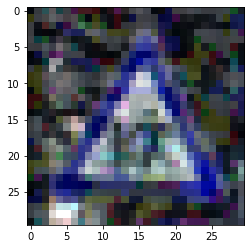

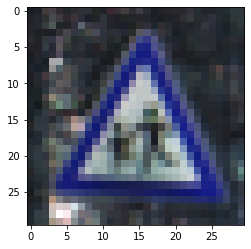

In [44]:
height = 30
width = 30
channels = 3
max_iterations = 1.0
i = 230
image = X_train[i]
plt.imshow(image)
image_label = y_train[i]

perturbations = adversarial_pattern(image.reshape((1, height, width, channels)), image_label).numpy()

for x in np.arange(0.0, max_iterations, 0.001):
    print("Noise:", x)
    adversarial = image + perturbations * x
    if labels[model.predict(image.reshape((1, height, width, channels))).argmax()] != labels[model.predict(adversarial).argmax()]:
        break
        
print(labels[model.predict(image.reshape((1, height, width, channels))).argmax()])
print(labels[model.predict(adversarial).argmax()])

if channels == 1:
    plt.imshow(adversarial.reshape((height, width)))
else:
    plt.imshow(adversarial.reshape((height, width, channels)))
plt.show()

image = X_train[i]
plt.imshow(image)

In [61]:
def find_adversary_noise(image, target_class , noise_limit=3.0,
                         required_score=0.99, max_iterations=10000):
    
    prediction = np.squeeze(model(image.reshape(1, height, width, channels)))
    source_class = np.argmax(prediction)
    source_score_org = prediction.max()
                            
    name_source = labels[np.argmax(prediction)]
    name_target = labels[target_class]
    
    noise = 0
    
    for i in range(max_iterations):
        print("Iteration:", i)
        
        noisy_image = image + noise
        noisy_image = np.clip(a=noisy_image, a_min=0.0, a_max=255.0)
        
        noisy_image = tf.cast(noisy_image, tf.float32)
        
        with tf.GradientTape() as tape:
            tape.watch(noisy_image)
            prediction = model(noisy_image)
            loss = tf.keras.losses.MSE(source_class, prediction)
        
        prediction = np.squeeze(prediction)
        gradient = tape.gradient(loss, noisy_image)
        
        score_target = prediction[target_class]
        score_source = prediction[source_class]
        
        gradient = np.array(gradient).squeeze()
        gradient_absmax = np.abs(gradient).max()
        
        if gradient_absmax < 1e-10:
            gradient_absmax = 1e-10
            
        step_size = 10 / gradient_absmax
        
        # Print the score etc. for the source-class.
        msg = "Source score: {0:>7.2%}, class-number: {1:>4}, class-name: {2}"
        print(msg.format(score_source, source_class, name_source))
        # Print the score etc. for the target-class.
        msg = "Target score: {0:>7.2%}, class-number: {1:>4}, class-name: {2}"
        print(msg.format(score_target, target_class, name_target))
        # Print statistics for the gradient.
        msg = "Gradient min: {0:>9.6f}, max: {1:>9.6f}, stepsize: {2:>9.2f}"
        print(msg.format(gradient.min(), gradient.max(), step_size))

        # Newline.
        print()
        
        if score_target < required_score:
            # Update the image-noise by subtracting the gradient
            # scaled by the step-size.
            noise -= step_size * gradient
            # Ensure the noise is within the desired range.
            # This avoids distorting the image too much.
            noise = np.clip(a=noise,
                            a_min=-noise_limit,
                            a_max=noise_limit)
            print(noise.shape)
        else:
            # Abort the optimization because the score is high enough.
            break
    

In [62]:
height = 30
width = 30
channels = 3
image = X_train[0]
find_adversary_noise(image.reshape(1, height, width, channels),42)

Iteration: 0
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 3
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 4
Sou

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 44
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 45
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 46
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 47
Source score

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 83
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 84
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 85
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 86
Source score

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 129
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 130
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 131
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 132
Source s

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 166
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 167
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 168
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 169
Source s

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 202
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 203
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 204
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 205
Source s

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 240
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 241
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 242
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 243
Source s

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 273
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 274
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 275
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 276
Source s

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 308
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 309
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 310
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 311
Source s

(30, 30, 3)
Iteration: 357
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 358
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 359
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 360
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30,

Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 402
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 403
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 404
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 405
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 446
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 447
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 448
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 449
Source s

Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 494
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 495
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 496
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 497
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 538
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 539
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 540
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 541
Source s

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 586
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 587
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 588
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 589
Source s

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 628
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 629
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 630
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 631
Source s

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 668
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 669
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 670
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 671
Source s

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 708
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 709
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 710
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 711
Source s

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 754
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 755
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 756
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 757
Source s

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 798
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 799
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 800
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 801
Source s

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 843
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 844
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 845
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 846
Source s

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 884
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 885
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 886
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 887
Source s

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 923
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 924
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 925
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 926
Source s

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 957
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 958
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 959
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 960
Source s

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 999
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1000
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1001
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1002
Sourc

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1034
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1035
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1036
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1037
Sour

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1068
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1069
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1070
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1071
Sour

(30, 30, 3)
Iteration: 1111
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1112
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1113
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1114
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30,

(30, 30, 3)
Iteration: 1160
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1161
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1162
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1163
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30,

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1206
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1207
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1208
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1209
Sour

(30, 30, 3)
Iteration: 1251
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1252
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1253
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1254
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30,

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1300
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1301
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1302
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1303
Sour

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1340
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1341
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1342
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1343
Sour

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1382
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1383
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1384
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1385
Sour

(30, 30, 3)
Iteration: 1429
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1430
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1431
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1432
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30,

(30, 30, 3)
Iteration: 1462
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1463
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1464
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1465
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30,

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1504
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1505
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1506
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1507
Sour

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1548
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1549
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1550
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1551
Sour

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1592
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1593
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1594
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1595
Sour

Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1640
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1641
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1642
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1643
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Grad

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1683
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1684
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1685
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1686
Sour

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1727
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1728
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1729
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1730
Sour

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1762
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1763
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1764
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1765
Sour

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1800
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1801
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1802
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1803
Sour

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1840
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1841
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1842
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1843
Sour

Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1881
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1882
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1883
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1884
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Grad

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1922
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1923
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1924
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1925
Sour

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1967
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1968
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1969
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 1970
Sour

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2005
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2006
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2007
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2008
Sour

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2049
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2050
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2051
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2052
Sour

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2090
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2091
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2092
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2093
Sour

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2126
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2127
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2128
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2129
Sour

Iteration: 2162
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2163
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2164
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2165
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iter

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2199
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2200
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2201
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2202
Sour

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2244
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2245
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2246
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2247
Sour

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2279
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2280
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2281
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2282
Sour

(30, 30, 3)
Iteration: 2321
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2322
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2323
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2324
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30,

Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2355
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2356
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2357
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2358
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Targ

Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2399
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2400
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2401
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2402
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Grad

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2446
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2447
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2448
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2449
Sour

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2492
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2493
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2494
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2495
Sour

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2536
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2537
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2538
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2539
Sour

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2575
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2576
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2577
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2578
Sour

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2616
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2617
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2618
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2619
Sour

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2660
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2661
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2662
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2663
Sour

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2699
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2700
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2701
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2702
Sour

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2737
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2738
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2739
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2740
Sour

Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2780
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2781
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2782
Source score: 100.00%, class-number:   34, class-name: Linksabbiegen
Target score:   0.00%, class-number:   42, class-name: Ende des LKW-Überholverbotes
Gradient min: -0.000000, max:  0.000000, stepsize: 100000000000.00

(30, 30, 3)
Iteration: 2783
Sour

KeyboardInterrupt: 

In [82]:
def input_derivative(net, x, y):
    """ Calculate derivatives wrt the inputs"""
    nabla_b = [np.zeros(b.shape) for b in net.biases]
    nabla_w = [np.zeros(w.shape) for w in net.weights]
    
    # feedforward
    activation = x
    activations = [x] # list to store all the activations, layer by layer
    zs = [] # list to store all the z vectors, layer by layer
    for b, w in zip(net.biases, net.weights):
        z = np.dot(w, activation)+b
        zs.append(z)
        activation = sigmoid(z)
        activations.append(activation)
        
    # backward pass
    delta = net.cost_derivative(activations[-1], y) * \
        sigmoid_prime(zs[-1])
    nabla_b[-1] = delta
    nabla_w[-1] = np.dot(delta, activations[-2].transpose())

    for l in xrange(2, net.num_layers):
        z = zs[-l]
        sp = sigmoid_prime(z)
        delta = np.dot(net.weights[-l+1].transpose(), delta) * sp
        nabla_b[-l] = delta
        nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        
    # Return derivatives WRT to input
    return net.weights[0].T.dot(delta)

def sneaky_adversarial(model, n, x_target, steps, eta, lam=.05):
    """
    net : network object
        neural network instance to use
    n : integer
        our goal label (just an int, the function transforms it into a one-hot vector)
    x_target : numpy vector
        our goal image for the adversarial example
    steps : integer
        number of steps for gradient descent
    eta : integer
        step size for gradient descent
    lam : float
        lambda, our regularization parameter. Default is .05
    """
    
    # Set the goal output
    goal = np.zeros((10, 1))
    goal[n] = 1
    # Create a random image to initialize gradient descent with
    x = np.random.normal(.5, .3, (784, 1))
    # Gradient descent on the input
    for i in range(steps):
        # Calculate the derivative
        d = input_derivative(model,x,goal)
        
        # The GD update on x, with an added penalty 
        # to the cost function
        # ONLY CHANGE IS RIGHT HERE!!!
        x -= eta * (d + lam * (x - x_target))
    return x

# Wrapper function
def sneaky_generate(n, m):
    """
    n: int 0-9, the target number to match
    m: index of example image to use (from the test set)
    """
    
    # Find random instance of m in test set
    idx = np.random.randint(0,8000)
    while y_test[idx] != m:
        idx += 1
    
    # Hardcode the parameters for the wrapper function
    a = sneaky_adversarial(model, n, X_test[idx], 100, 1)
    x = np.round(model.feedforward(a), 2)
    
    print('\nWhat we want our adversarial example to look like: ')
    plt.imshow(test_data[idx][0].reshape((28,28)), cmap='Greys')
    plt.show()
    
    print('\n')
    
    print('Adversarial Example: ')
    
    plt.imshow(a.reshape(28,28), cmap='Greys')
    plt.show()
    
    print('Network Prediction: ' + str(np.argmax(x)) + '\n')
    
    print('Network Output: \n' + str(x) + '\n')
    
    return a

In [83]:
adv_ex = sneaky_generate(8, 2)

AttributeError: 'Sequential' object has no attribute 'biases'